# Linear Regression
This is the code for the "How to Do Linear Regression the Right Way"

In [1]:
import numpy as np # Numpy is for efficient Computations on Arrays
import matplotlib.pyplot as plt


# Step 1 - Get Gata

In [2]:
points = np.genfromtxt("data.csv", delimiter=",")
print(points[0:5 , :]) # Print the first 5 elements

[[32.50234527 31.70700585]
 [53.42680403 68.77759598]
 [61.53035803 62.5623823 ]
 [47.47563963 71.54663223]
 [59.81320787 87.23092513]]


# Step 2 - Define our Parameters

In [3]:
learning_rate = 0.0001 # How fast our model should converge

# Y = Mx + B
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess    
num_iterations = 10000

# Step 3 - Calculate Error

In [4]:
# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    # Get the average
    return totalError / float(len(points))

In [5]:
initial_e = compute_error_for_line_given_points(initial_b, initial_m, points);
a = "Starting gradient descent at b = {b_value}, m = {m_value}, error = {e_value}".format(b_value = initial_b , m_value = initial_m , e_value = initial_e);    
print(a);

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211


# Step 4 - Do Gradient

In [6]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [7]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
    return [b, m]

In [8]:
print("Running...");
[b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations);
e = compute_error_for_line_given_points(b, m, points);
a = "Starting gradient descent at b = {b_value}, m = {m_value}, error = {e_value}".format(b_value = b , m_value = m , e_value = e);    
print(a);

Running...
Starting gradient descent at b = 0.6078985997054931, m = 1.4675440436333027, error = 112.31533427075733


# Step 5 - Plot

In [9]:
x = points[:, 0];
y = points[:, 1];

xLine = np.linspace(start = 1 , stop = 100);
yLine = (xLine * m) + b;

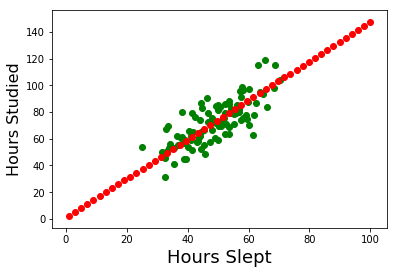

In [10]:
plt.scatter(x , y , color='g')
plt.scatter(xLine , yLine , color='r')


plt.xlabel('Hours Slept', fontsize=18)
plt.ylabel('Hours Studied', fontsize=16)

plt.show()